In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 32.9 MB/s eta 0

In [1]:
from pycaret.utils import version
version()

'3.1.0'

In [3]:
import pandas as pd
df = pd.read_csv("/content/Logan_housing.csv")#Import the Logan_housing.csv file as save it in a data frame df.
df.head()#Show the head (top 5 rows) of the data frame! (5 points)


,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [4]:
df.isna().any()#Check to see if there is any missing observations in the data set. (5 points)

Sold Price           False
DOM                  False
Garage Capacity      False
HOA Fee              False
Irregular Shape      False
Quadrant             False
School District      False
Sold Terms           False
Total Bedrooms       False
Total Bathrooms      False
Total Square Feet    False
Year Built           False
Zip                  False
year_sold            False
month_sold           False
built_after_2000     False
dtype: bool

DOM  is your target variable and the rest of the variables are all independent variables (features). Before moving on, we need to make sure all the variables have the right types. Which variables should be categorical and which ones should be numeric (float32)?

built_after_2000, School District, Irregular Shape, Quadrant, and Sold Terms should be categorical. The rest should be integers.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

In [6]:
df.nunique()

Sold Price           1217
DOM                   248
Garage Capacity        14
HOA Fee                96
Irregular Shape         2
Quadrant                4
School District         2
Sold Terms              6
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
Year Built            136
Zip                    16
year_sold               3
month_sold             12
built_after_2000        2
dtype: int64

In [7]:
columns_convert = ['built_after_2000','Sold Terms', 'School District', 'Quadrant','Irregular Shape']
for col in columns_convert:
    df[col] = df[col].astype('category') #Use your python programming skills to change the type of these variables in your data frame.
df.info() #Run df.info() to double check your changes have been applied to the data frame. (10 points)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   int64   
 1   DOM                4110 non-null   int64   
 2   Garage Capacity    4110 non-null   int64   
 3   HOA Fee            4110 non-null   int64   
 4   Irregular Shape    4110 non-null   category
 5   Quadrant           4110 non-null   category
 6   School District    4110 non-null   category
 7   Sold Terms         4110 non-null   category
 8   Total Bedrooms     4110 non-null   int64   
 9   Total Bathrooms    4110 non-null   int64   
 10  Total Square Feet  4110 non-null   int64   
 11  Year Built         4110 non-null   int64   
 12  Zip                4110 non-null   int64   
 13  year_sold          4110 non-null   int64   
 14  month_sold         4110 non-null   int64   
 15  built_after_2000   4110 non-null   category
dtypes: cat

In [8]:
df.columns

Index(['Sold Price', 'DOM', 'Garage Capacity', 'HOA Fee', 'Irregular Shape',
       'Quadrant', 'School District', 'Sold Terms', 'Total Bedrooms',
       'Total Bathrooms', 'Total Square Feet', 'Year Built', 'Zip',
       'year_sold', 'month_sold', 'built_after_2000'],
      dtype='object')

 Hint: You can use the df.nunique() method, to figure out what should be the right type for each variable. For example, the "Quadrant" has only 4 unique values, this suggests Quadrant should be categorical.

In [9]:
data = df.sample(frac=0.95, random_state=500)#Divide your data frame into 2 parts. "data" for modeling (95% of the data) and "unseen data" for prediction (5% of the data). (10 points)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [10]:
data

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,317000,21,2,0,No,NE,Logan,VA,5,3,2798,1989,84341,2018,10,0
1,275900,10,2,0,No,NE,Cache,Conventional,5,3,2470,1974,84341,2020,4,0
2,228000,4,2,70,No,SW,Cache,Conventional,2,2,1335,2006,84335,2019,10,1
3,325000,15,2,0,No,SE,Logan,Cash,3,2,1741,2019,84321,2019,5,1
4,329900,35,2,0,No,NE,Logan,Conventional,5,3,2486,1992,84341,2020,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,285000,5,2,0,Yes,NE,Logan,Conventional,5,3,2786,1978,84321,2018,6,0
3900,377450,72,2,0,No,NW,Cache,Other,5,4,3386,1992,84326,2020,8,0
3901,395000,8,3,1,Yes,SE,Cache,VA,4,4,4090,1993,84332,2018,10,0
3902,215000,36,2,125,No,SE,Cache,Conventional,3,3,1669,2013,84335,2019,3,1


 Hint: You can borrow the same code we used in class. You only need to change the fraction from 0.9 to 0.95. Also make sure your random state = 500

We are now ready to do ML regression with PyCaret. Start by importing regression models.

In [11]:
from pycaret.regression import *

Set up your pycaret environment. Make an experiment and name it as my_experiment. Note that your target variable should be "DOM". Also make sure your assign your categrical_features and numeric_features.

In [12]:
numeric_columns = ['Sold Price', 'Garage Capacity', 'HOA Fee','Total Bedrooms',
       'Total Bathrooms', 'Total Square Feet', 'Year Built', 'Zip',
       'year_sold', 'month_sold']

In [13]:
my_experiment = RegressionExperiment()
my_experiment.setup(data, target='DOM', session_id=555, categorical_features= columns_convert ,numeric_features= numeric_columns, train_size=0.8, preprocess=True)



,Description,Value
0,Session id,555
1,Target,DOM
2,Target type,Regression
3,Original data shape,"(3904, 16)"
4,Transformed data shape,"(3904, 24)"
5,Transformed train set shape,"(3123, 24)"
6,Transformed test set shape,"(781, 24)"
7,Ordinal features,3
8,Numeric features,10
9,Categorical features,5


Make the following list of models: model_list = ['lr', 'en', 'xgboost', 'catboost', 'lightgbm']. Note that "lr" stands for linear regression model and "en" stands for elastic net. You can find the list of available regression models by running my_experiment.models() in your notebook. Now compare the performance of these models sorted by RMSE.

In [14]:
model_list = ['lr', 'en', 'xgboost', 'catboost', 'lightgbm']

In [15]:
my_models = my_experiment.compare_models(include=model_list, n_select=5, sort= 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,32.5843,2518.4900,49.7969,0.1012,1.2802,3.6075,2.1520
lightgbm,Light Gradient Boosting Machine,32.9669,2548.5446,50.0789,0.0933,1.2879,3.6383,0.8540
en,Elastic Net,34.2820,2552.3420,50.1358,0.0924,1.3636,4.2090,0.2580
lr,Linear Regression,34.3548,2561.9063,50.2255,0.0893,1.3632,4.1955,0.8990
xgboost,Extreme Gradient Boosting,34.6699,2989.1623,54.2909,-0.0774,1.3452,3.7239,0.4290


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

Tune all of the models in your "model_list"  optimized on RMSE , which model is the winner among the 10 models (5 tuned and 5 not tuned) (5 points)

In [16]:
data['DOM'].value_counts()

3      247
4      202
2      196
5      184
6      129
      ... 
159      1
461      1
285      1
221      1
227      1
Name: DOM, Length: 247, dtype: int64

In [18]:
my_models

 LGBMRegressor(n_jobs=-1, random_state=555),
 ElasticNet(random_state=555),
 LinearRegression(n_jobs=-1),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=555, ...)]

In [17]:
tuned_models = [my_experiment.tune_model(model, optimize='RMSE') for model in my_models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.1786,1939.5364,44.0402,0.1202,1.3552,4.2454
1,28.5374,1418.8017,37.6670,0.1328,1.2805,3.7228
2,32.9880,2307.7824,48.0394,0.1469,1.2267,3.1262
3,30.6631,1861.8159,43.1488,0.1499,1.2618,3.4113
4,33.1122,2323.1611,48.1992,0.1435,1.3277,4.0901
5,35.0792,3614.5436,60.1211,0.1274,1.3041,3.6367
6,30.4687,2238.7529,47.3155,0.1717,1.2656,3.6096
7,35.3425,3053.0309,55.2542,0.1015,1.4352,4.9360
8,35.7068,3034.3522,55.0850,0.1926,1.3308,4.2092


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33.7258,2096.0621,45.7828,0.0492,1.4031,4.2433
1,30.6110,1740.0580,41.7140,-0.0636,1.3373,3.4029
2,34.3843,2511.1278,50.1112,0.0717,1.3066,3.2584
3,30.1932,1888.3701,43.4554,0.1377,1.2729,3.0454
4,32.4311,2344.5011,48.4200,0.1356,1.2993,3.5513
5,35.9552,3744.9437,61.1959,0.0959,1.3616,3.3431
6,29.9975,2129.8045,46.1498,0.2120,1.2639,3.4301
7,36.4901,3080.6429,55.5035,0.0934,1.4822,4.9100
8,37.1132,3255.0505,57.0530,0.1338,1.3896,4.1652


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.2529,2049.4882,45.2713,0.0703,1.4173,4.6571
1,30.4456,1533.4215,39.1589,0.0627,1.3358,4.0660
2,35.2608,2631.7795,51.3009,0.0271,1.3111,3.4831
3,31.7590,1929.3424,43.9243,0.1190,1.3258,3.8801
4,34.3257,2465.2198,49.6510,0.0911,1.3731,4.3453
5,36.1365,3771.9640,61.4163,0.0894,1.3463,3.8222
6,32.9533,2391.5829,48.9038,0.1152,1.3408,4.3244
7,37.0811,3163.4817,56.2448,0.0690,1.4790,5.2246
8,36.5071,3168.0598,56.2855,0.1570,1.3578,4.2963


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.3156,2050.6444,45.2840,0.0698,1.4263,4.6195
1,30.4261,1527.5716,39.0842,0.0663,1.3305,4.0196
2,35.2493,2636.9039,51.3508,0.0252,1.3110,3.4389
3,31.8112,1947.6195,44.1318,0.1107,1.3284,3.8693
4,34.4622,2466.7878,49.6668,0.0906,1.3751,4.3312
5,36.4355,3802.5361,61.6647,0.0820,1.3482,3.8091
6,33.0901,2419.7227,49.1907,0.1047,1.3426,4.3286
7,36.8973,3165.9474,56.2668,0.0683,1.4740,5.1885
8,36.5000,3167.1113,56.2771,0.1572,1.3547,4.2446


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31.9312,2212.5831,47.0381,-0.0036,1.3014,3.6222
1,28.3532,1589.4246,39.8676,0.0285,1.2232,3.0107
2,32.2872,2725.5699,52.2070,-0.0076,1.1750,2.7924
3,29.2045,1815.2392,42.6056,0.1711,1.1877,2.8562
4,31.4599,2233.9053,47.2642,0.1764,1.2602,3.4199
5,36.6528,4070.0536,63.7970,0.0175,1.2862,3.1942
6,29.4080,2096.3343,45.7857,0.2244,1.1913,3.0135
7,34.2743,3020.7844,54.9617,0.1110,1.3715,4.3719
8,34.6948,3050.6463,55.2327,0.1882,1.3088,3.9372


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
tuned_models

 LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, feature_fraction=0.8,
               learning_rate=0.4, min_child_samples=46, min_split_gain=0.6,
               n_estimators=20, n_jobs=-1, num_leaves=90, random_state=555,
               reg_alpha=1e-07, reg_lambda=0.15),
 ElasticNet(alpha=0.08, fit_intercept=False, l1_ratio=0.497, random_state=555),
 LinearRegression(n_jobs=-1),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constr

Now that you know which model is the winner, go ahead and create it as a separate object in Pycaret. Note, if the winner is one of the tuned models, you need to create that tuned model as a separate object as well. (10 points)

In [20]:
catboost = my_experiment.create_model('catboost')
tuned_catboost = my_experiment.tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.2553,2195.1479,46.8524,0.0043,1.3249,3.8273
1,28.8471,1589.4047,39.8673,0.0285,1.2410,3.1961
2,32.9729,2542.8987,50.4272,0.0600,1.2017,3.1003
3,30.7683,2009.8716,44.8316,0.0823,1.2456,3.2676
4,31.0148,2104.3044,45.8727,0.2242,1.2697,3.7358
5,36.3568,3992.1903,63.1838,0.0363,1.3095,3.3938
6,30.0480,2141.8716,46.2804,0.2075,1.2466,3.4790
7,34.5877,3002.4716,54.7948,0.1164,1.3991,4.6771
8,35.2343,2946.3678,54.2805,0.2160,1.3098,4.1718


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.1786,1939.5364,44.0402,0.1202,1.3552,4.2454
1,28.5374,1418.8017,37.6670,0.1328,1.2805,3.7228
2,32.9880,2307.7824,48.0394,0.1469,1.2267,3.1262
3,30.6631,1861.8159,43.1488,0.1499,1.2618,3.4113
4,33.1122,2323.1611,48.1992,0.1435,1.3277,4.0901
5,35.0792,3614.5436,60.1211,0.1274,1.3041,3.6367
6,30.4687,2238.7529,47.3155,0.1717,1.2656,3.6096
7,35.3425,3053.0309,55.2542,0.1015,1.4352,4.9360
8,35.7068,3034.3522,55.0850,0.1926,1.3308,4.2092


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Read the PyCaret documentation for regression plot_model() and plot the following 4 figures for your winning regression model. Parameters table, Residuals plot, learning curve and feature importance.

In [21]:
my_experiment.plot_model(tuned_catboost, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,230
sampling_frequency,PerTree
leaf_estimation_method,Newton
random_score_type,NormalWithModelSizeDecrease
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant


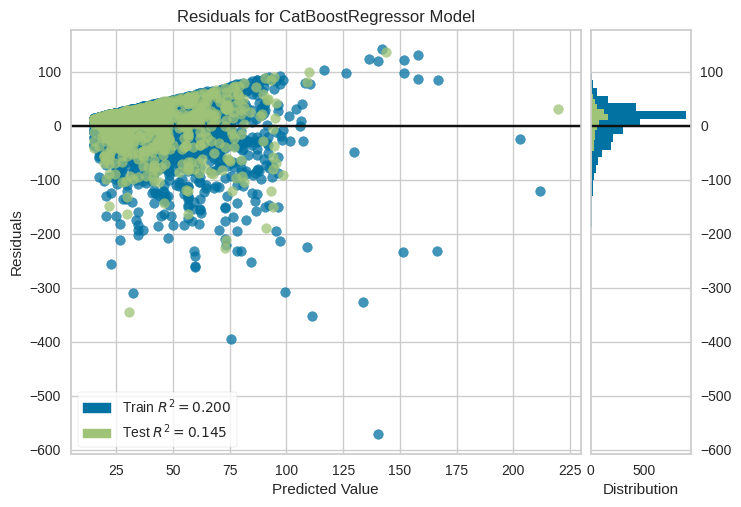

In [22]:
my_experiment.plot_model(tuned_catboost, plot = 'residuals')

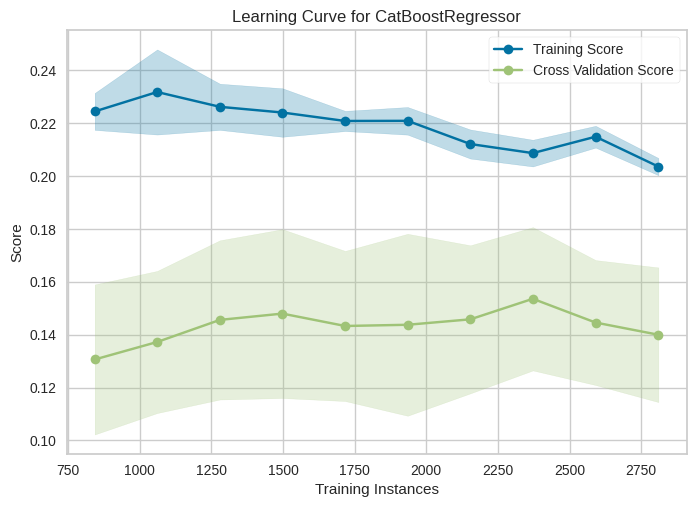

In [23]:
my_experiment.plot_model(tuned_catboost, plot = 'learning')

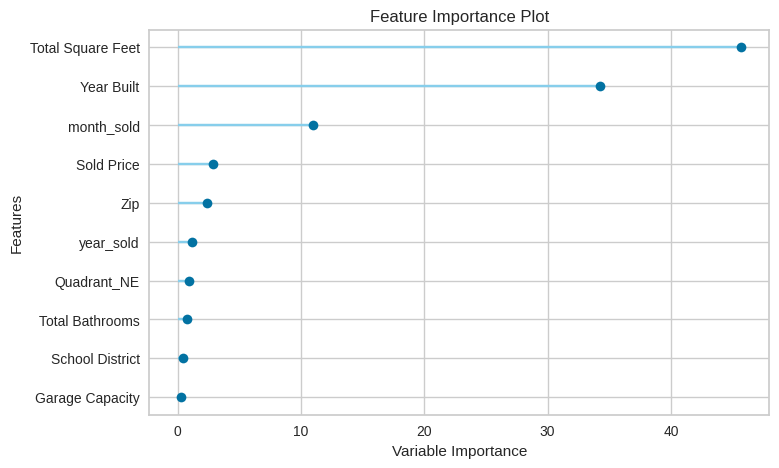

In [24]:
my_experiment.plot_model(tuned_catboost, plot = 'feature')

Make predictions on the holdout set (validation set) and report the RMSE? (5 points)

In [25]:
holdout_pred = my_experiment.predict_model(tuned_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,30.7046,1811.1613,42.5577,0.1455,1.2662,3.4956


The RMSE is predicted to be 42.56.

In [26]:
holdout_pred

,Sold Price,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000,DOM,prediction_label
547,232500,0,0,No,NE,Cache,Conventional,5,2,2161,1984,84341,2020,11,0,5,29.614647
1467,220000,2,110,No,SE,Cache,Conventional,3,3,1767,2018,84319,2019,7,1,14,56.379721
2591,224900,2,110,No,SE,Cache,Conventional,3,3,1460,2020,84319,2020,11,1,7,45.105711
2002,214000,1,0,No,NW,Logan,Conventional,3,2,1544,1931,84321,2020,5,0,6,20.484503
821,147500,1,85,No,NE,Logan,FHA,2,3,1370,1977,84321,2018,8,0,3,19.565660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,177365,2,75,No,NW,Logan,Other,3,3,1616,2017,84341,2018,1,1,95,66.755971
3607,425000,2,0,No,SW,Cache,Cash,5,4,3766,2001,84321,2019,9,1,2,47.214033
3348,170000,1,0,No,NW,Cache,Conventional,4,1,1956,1948,84335,2019,8,0,4,21.936970
776,207500,2,10,No,SE,Logan,FHA,4,2,1802,1993,84321,2018,2,0,112,36.817079


Finalize your model and train it on the entire "data": train + holdout set. Save the finalize model as "my_winning_model"

In [27]:
final_model = my_experiment.finalize_model(tuned_catboost)

In [28]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Sold Price', 'Garage Capacity',
                                             'HOA Fee', 'Total Bedrooms',
                                             'Total Bathrooms',
                                             'Total Square Feet', 'Year Built',
                                             'Zip', 'year_sold', 'month_sold'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['built_after_2000', 'Sold Terms',
                                             'School Dist...
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sold Terms', 'Quadrant'],
                                    transformer=OneHotEncoder(cols=['Sold '
                                                                    'Terms',
                                                                    'Quadrant'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7d46c2543a90>)])

Use your winning model to make predictions on the "unseen data". What is the RMSE? (5 points)
Save your model as 'HW3_pycaret_regression' for future use. (5 points)

In [29]:
unseen_predictions = my_experiment.predict_model(final_model, data=data_unseen)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,30.6613,1893.3788,43.5130,0.1225,1.2169,3.3351


,Sold Price,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000,DOM,prediction_label
0,274000,2,0,No,NW,Cache,Cash,7,3,2688,1996,84305,2018,7,0,4,30.638445
1,397000,3,100,No,NE,Cache,Conventional,5,4,3312,2014,84318,2020,10,1,1,45.231501
2,299900,2,0,No,NW,Cache,Conventional,4,2,2301,2000,84318,2020,2,1,3,41.630691
3,360000,2,0,No,NW,Cache,Conventional,5,3,2536,2002,84318,2020,10,1,4,28.621291
4,295000,2,0,Yes,SE,Cache,Conventional,5,2,2485,1986,84318,2019,6,0,7,31.943952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,375000,4,0,Yes,NE,Cache,Conventional,4,3,3364,2006,84339,2019,7,1,29,47.049179
202,700000,3,0,No,SW,Cache,Conventional,5,4,4034,2001,84339,2020,9,1,38,52.820498
203,207500,2,0,No,NW,Cache,FHA,3,1,1234,1903,84339,2019,9,0,99,25.794456
204,690000,4,600,No,SW,Cache,Conventional,5,4,3670,2013,84339,2020,9,1,323,55.340480


The RMSE for the tuned catboost model on unseen data was 43.51.

In [30]:
my_experiment.save_model(final_model, 'HW3_pycaret_regession')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Sold Price', 'Garage Capacity',
                                              'HOA Fee', 'Total Bedrooms',
                                              'Total Bathrooms',
                                              'Total Square Feet', 'Year Built',
                                              'Zip', 'year_sold', 'month_sold'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['built_after_2000', 'Sold Terms',
                                              'School Dist...
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sold Terms', 'Quadrant'],
                                     transformer=OneHotEncoder(cols=['Sold '
                                                                     'Te